Sales Prediction ( simple linear regression )

In [58]:
#Import necessary libraries for data analysis and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#Load data from a CSV file named "data.csv".
data = pd.read_csv("data.csv")

In [60]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [61]:
type(data)

pandas.core.frame.DataFrame

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [63]:
data.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [64]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

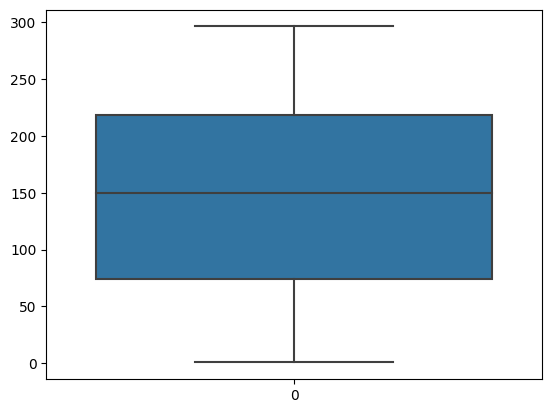

In [65]:
# outlier analysis
sns.boxplot(data['TV'])

<Axes: >

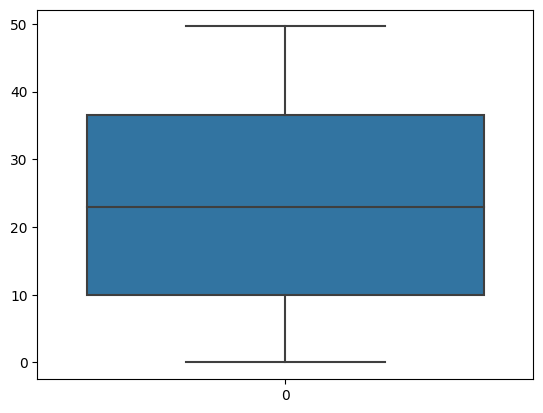

In [66]:
#Create a box plot for the "Radio" column in the dataset.
sns.boxplot(data['Radio'])

<Axes: >

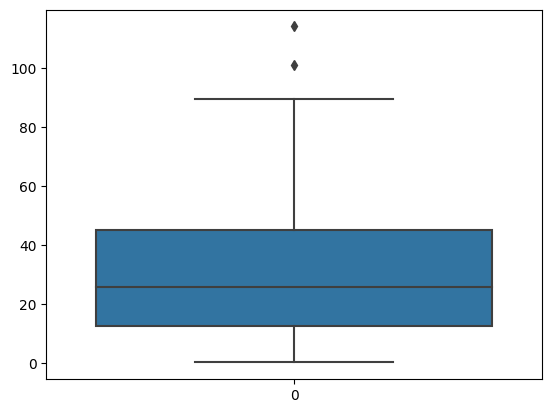

In [67]:
#Generate a box plot for the "Newspaper" column in the dataset.
sns.boxplot(data['Newspaper'])

<Axes: >

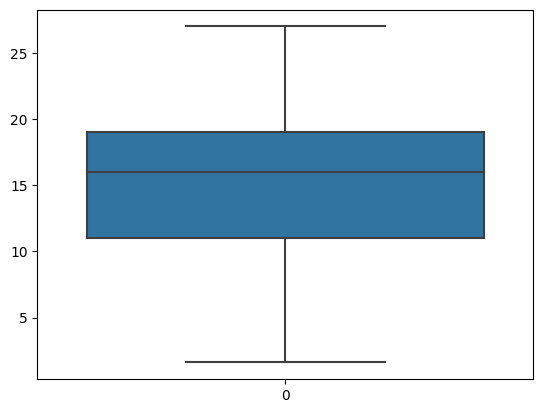

In [68]:
#Create a box plot for the "Sales" column in the dataset.
sns.boxplot(data['Sales'])

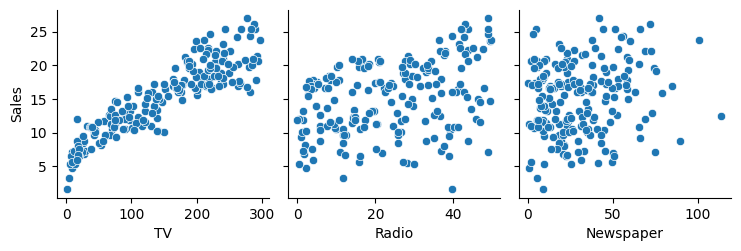

In [69]:
#Produce pair plot for "TV", "Radio", "Newspaper" vs. "Sales" using scatter plots.
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter')

<Axes: >

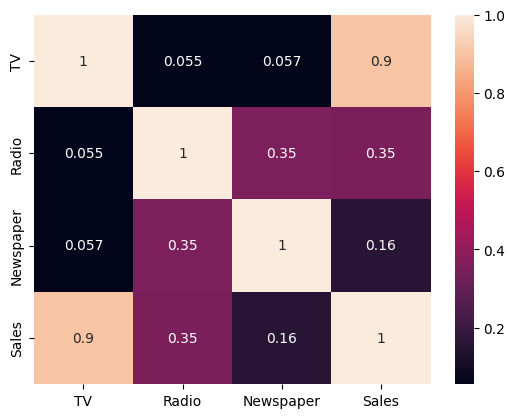

In [70]:
#Display a heatmap of correlation between dataset features with annotations.
sns.heatmap(data.corr(),annot=True)

It can be observed that, attribute 'TV' has maximum correlation with sales

In [71]:
#Reshape 'TV' and 'Sales' columns as input and output arrays.
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

In [72]:
#Split data into training and testing sets using an 80-20 ratio.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2)

In [73]:
#Import LinearRegression model from scikit-learn.
from sklearn.linear_model import LinearRegression

In [74]:
#Create an instance of the LinearRegression model.
regressor = LinearRegression()

In [75]:
#Train the LinearRegression model on the training data.
regressor.fit(X_train,y_train)

LinearRegression()

In [76]:
#Print the intercept and coefficients of the trained LinearRegression model.
print("intercept:",regressor.intercept_)
print("coeffficient:",regressor.coef_)


intercept: [7.09085979]
coeffficient: [[0.05442596]]


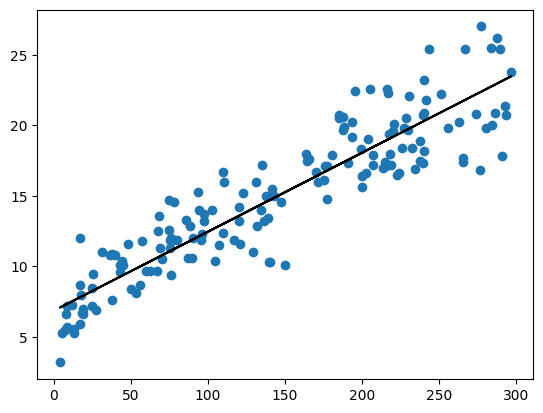

In [77]:
#Plot the scatter plot of training data points and overlay the regression line.
plt.scatter(X_train,y_train)
plt.plot(X_train,0.056*X_train+6.859,'black')

In [78]:
#Predict the output (y-values) for the test set using the trained model.
y_pred = regressor.predict(X_test)

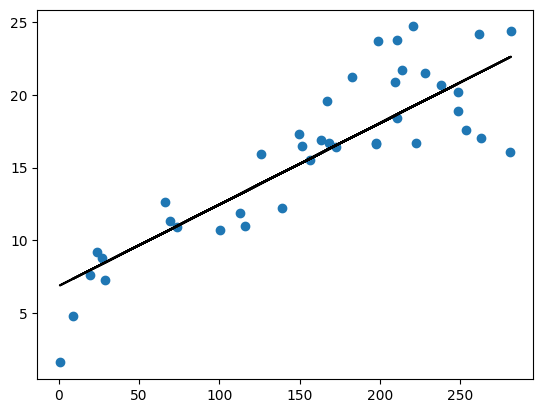

In [79]:
#Plot the scatter plot of test data points along with the regression line.
plt.scatter(X_test,y_test)
plt.plot(X_test,0.056*X_test+6.859,'black')

In [80]:
print(y_pred)

[[13.40427136]
 [14.66695368]
 [17.9161836 ]
 [ 7.12895796]
 [18.56385255]
 [16.47933821]
 [18.71080265]
 [17.84542985]
 [16.25619177]
 [ 7.55892306]
 [13.93220319]
 [19.19519371]
 [ 8.15760864]
 [21.31236362]
 [15.33639301]
 [20.0551239 ]
 [13.23555088]
 [22.40632546]
 [11.08572539]
 [19.08089919]
 [ 8.6474423 ]
 [18.49854139]
 [20.6320391 ]
 [16.16911023]
 [10.85713635]
 [20.61026871]
 [ 8.38619768]
 [22.36822728]
 [15.61396542]
 [15.23842628]
 [17.84542985]
 [17.02904042]
 [19.49997909]
 [10.68841587]
 [15.97861936]
 [ 8.54947557]
 [20.90416891]
 [12.55522636]
 [18.55840995]
 [21.39944516]]


In [81]:
#Import metrics functions: mean squared error, mean absolute error, and R-squared.
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [82]:
mean_squared_error(y_test,y_pred)

7.686000032232246

In [83]:
mean_absolute_error(y_test,y_pred)

2.1731823652922753

In [84]:
np.sqrt(mean_absolute_error(y_test,y_pred))

1.474171755696152

In [85]:
r2_score(y_test,y_pred)

0.752855328211451